### 1 数据导入

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_wy = pd.read_csv(r'./文娱行业_full.csv')
df_ct = pd.read_csv(r'./传统行业_full.csv')
df_fw = pd.read_csv(r'./服务业_full.csv')
df_zz = pd.read_csv(r'./制造业_full.csv')
df1_full = pd.read_csv(r'./Sample_full.csv')

### 2 基于互信息进行特征筛选

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

imp_mut = SelectKBest(mutual_info_classif,k=60)
df_mut_wy=pd.DataFrame(imp_mut.fit_transform(df_wy.iloc[:,1:-1],df_wy['FLAG']))
df_mut_wy.columns = df_wy.iloc[:,1:-1].columns[imp_mut.get_support()]

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

imp_mut = SelectKBest(mutual_info_classif,k=60)
df_mut_ct=pd.DataFrame(imp_mut.fit_transform(df_ct.iloc[:,1:-1],df_ct['FLAG']))
df_mut_ct.columns = df_ct.iloc[:,1:-1].columns[imp_mut.get_support()]

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

imp_mut = SelectKBest(mutual_info_classif,k=60)
df_mut_fw=pd.DataFrame(imp_mut.fit_transform(df_fw.iloc[:,1:-1],df_fw['FLAG']))
df_mut_fw.columns = df_fw.iloc[:,1:-1].columns[imp_mut.get_support()]

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

imp_mut = SelectKBest(mutual_info_classif,k=60)
df_mut_zz=pd.DataFrame(imp_mut.fit_transform(df_zz.iloc[:,1:-1],df_zz['FLAG']))
df_mut_zz.columns = df_zz.iloc[:,1:-1].columns[imp_mut.get_support()]

In [7]:
b = []
c =60
for i in range(c):
    for j in range(c):
        for n in range(c):
            for m in range(c):
                if df_mut_wy.columns[i]==df_mut_ct.columns[j] and df_mut_wy.columns[i]==df_mut_fw.columns[n] and df_mut_wy.columns[i]==df_mut_zz.columns[m]:
                    b.append(df_mut_wy.columns[i])

### 3 基于XGBoost进行特征筛选

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 1) T_NCL                          0.043083
 2) SELL_EXP                       0.028880
 3) N_CE_BEG_BAL                   0.028182
 4) C_INF_FR_INVEST_A              0.021399
 5) LT_EQUITY_INVEST               0.020874
 6) N_CF_FR_FINAN_A                0.019788
 7) T_ASSETS                       0.019701
 8) T_PROFIT                       0.018483
 9) CASH_C_EQUIV                   0.017310
10) T_LIAB                         0.016947
11) C_PAID_FOR_OTH_OP_A            0.016381
12) SURPLUS_RESER                  0.016142
13) T_NCA                          0.015656
14) ADVANCE_RECEIPTS               0.015323
15) BIZ_TAX_SURCHG                 0.014603
16) OTH_CA                    

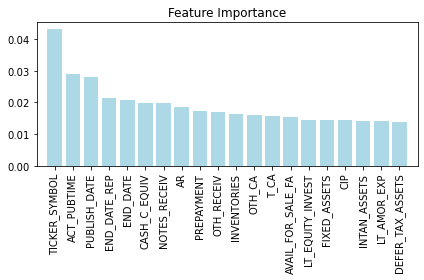

In [8]:
#基于XGBoost进行特征重要性排名，进行特征提取
from xgboost import XGBClassifier as XGBC

reg_imp=XGBC()
reg_imp.fit(df1_full.iloc[:,1:-1],df1_full['FLAG'])
importances=reg_imp.feature_importances_

feat_labels = df1_full.columns
np.unique(df1_full['FLAG'])
indices = np.argsort(importances)[::-1]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(20), importances[indices[:20]], color='lightblue', align='center')
plt.xticks(range(20), feat_labels[:20], rotation=90)
plt.xlim([-1, 20])

plt.tight_layout()
plt.show()

a = []
for f in range(50):
    a.append(feat_labels[indices[f]])
df_xgb_top = df1_full[a]

### 4 基于Lightgbm进行特征筛选

 1) BIZ_TAX_SURCHG                 86.000000
 2) OPERATE_PROFIT                 80.000000
 3) T_LIAB                         79.000000
 4) TAXES_PAYABLE                  77.000000
 5) ST_BORR                        75.000000
 6) AR                             73.000000
 7) C_FR_SALE_G_S                  66.000000
 8) N_CHANGE_IN_CASH               64.000000
 9) T_CA                           61.000000
10) T_LIAB_EQUITY                  57.000000
11) DEFER_REVENUE                  57.000000
12) PAYROLL_PAYABLE                56.000000
13) C_PAID_FOR_DEBTS               56.000000
14) C_INF_FR_OPERATE_A             54.000000
15) DISP_FIX_ASSETS_OTH            53.000000
16) N_INCOME_ATTR_P                52.000000
17) C_FR_BORR                      49.000000
18) INTAN_ASSETS                   49.000000
19) INCOME_TAX                     48.000000
20) PREPAYMENT                     48.000000


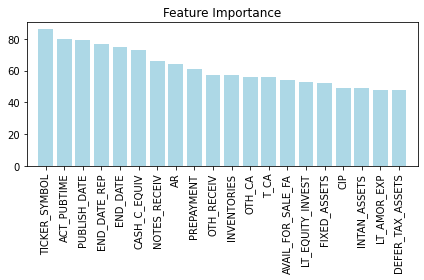

In [9]:
#基于lightgbm进行特征重要性排名，进行特征提取
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

reg1_imp=lgb.LGBMClassifier()
reg1_imp.fit(df1_full.iloc[:,1:-1],df1_full['FLAG'])
importances=reg1_imp.feature_importances_

feat_labels = df1_full.columns
np.unique(df1_full['FLAG'])
indices = np.argsort(importances)[::-1]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(20), importances[indices[:20]], color='lightblue', align='center')
plt.xticks(range(20), feat_labels[:20], rotation=90)
plt.xlim([-1, 20])

plt.tight_layout()
plt.show()

b = []
for f in range(50):
    b.append(feat_labels[indices[f]])
df_lgb_top = df1_full[b]

### 5 基于RandomForest进行特征筛选

 1) ST_BORR                        0.018057
 2) LT_AMOR_EXP                    0.017162
 3) OPERATE_PROFIT                 0.016042
 4) N_CHANGE_IN_CASH               0.014590
 5) SURPLUS_RESER                  0.014580
 6) T_LIAB_EQUITY                  0.014485
 7) C_PAID_FOR_DEBTS               0.014397
 8) FINAN_EXP                      0.014221
 9) C_INF_FR_FINAN_A               0.014209
10) BIZ_TAX_SURCHG                 0.013899
11) T_CL                           0.013822
12) ADVANCE_RECEIPTS               0.013759
13) T_CA                           0.013407
14) AVAIL_FOR_SALE_FA              0.013033
15) NOPERATE_INCOME                0.012967
16) TAXES_PAYABLE                  0.012951
17) C_PAID_OTH_FINAN_A             0.012740
18) N_CE_BEG_BAL                   0.012700
19) PREPAYMENT                     0.012602
20) C_PAID_FOR_OTH_OP_A            0.012569


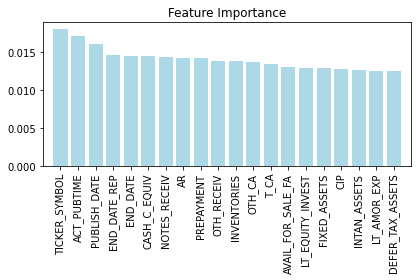

In [10]:
#基于randonforest进行特征重要性排名，进行特征提取
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

reg1_imp=RandomForestClassifier()
reg1_imp.fit(df1_full.iloc[:,1:-1],df1_full['FLAG'])
importances=reg1_imp.feature_importances_

feat_labels = df1_full.columns
np.unique(df1_full['FLAG'])
indices = np.argsort(importances)[::-1]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(20), importances[indices[:20]], color='lightblue', align='center')
plt.xticks(range(20), feat_labels[:20], rotation=90)
plt.xlim([-1, 20])

plt.tight_layout()
plt.show()

c = []
for f in range(50):
    c.append(feat_labels[indices[f]])
df_rf_top = df1_full[c]

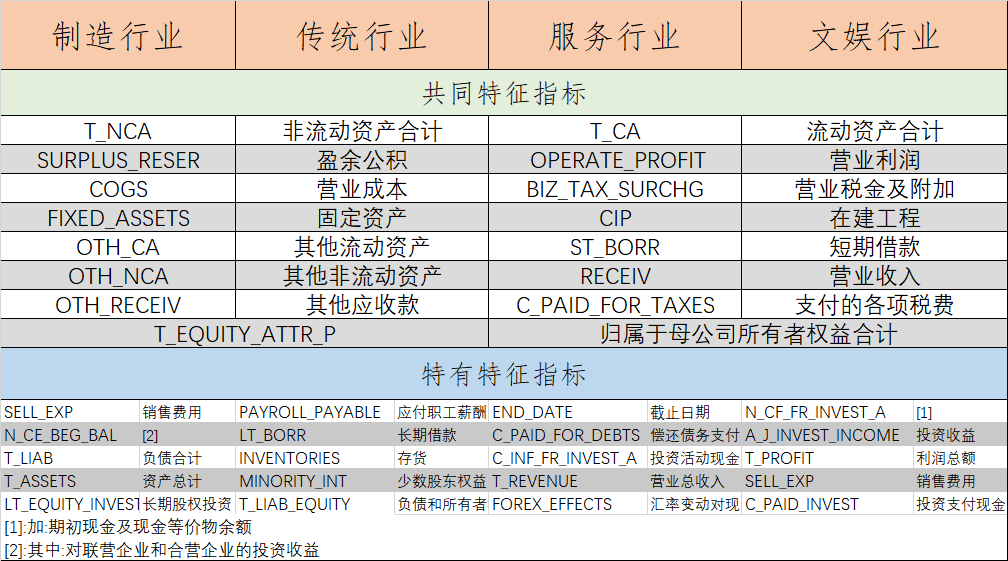